
# Predicting the winner of the 2024 Euro Football Championship, A Case Study

This report seeks to use data collected from international football games from 1872 to 2023 to predict the outcome of the 2024 UEFA Euro Championship. Before we "kick-off" our predictions, we will first pull a few exploratory reports from the data, providing insights on the many variables in play when it comes to predicting which team will ultimately lift the 2024 Euro trophy. 

### 💾 The data

- `data/results.csv` - CSV with results of soccer games between 1872 and 2023
  - `home_score` - The score of the home team, excluding penalty shootouts
  - `away_score` - The score of the away team, excluding penalty shootouts
  - `tournament` - The name of the tournament
  - `city` - The name of the city where the game was played
  - `country` - The name of the country where the game was played
  - `neutral` - Whether the game was played at a neutral venue or not
- `data/shootouts.csv` - CSV with results of penalty shootouts in the soccer games
  - `winner` - The team that won the penalty shootout 
- `data/goalscorers.csv` - CSV with information on goal scorers of some of the soccer games in the results CSV
  - `team` - The team that scored the goal
  - `scorer` - The player who scored the goal
  - `minute` - The minute in the game when the goal was scored
  - `own_goal` - Whether it was an own goal or not
  - `penalty` - Whether the goal was scored as a penalty or not

The following columns can be found in all datasets:

- `date` - The date of the soccer game
- `home_team` - The team that played at home
- `away_team` - The team that played away


Source: [GitHub](https://github.com/martj42/international_results/tree/baf917b948eec00f659d2f187c33c13547f7adc4)

## Exploratory Analysis

We will first conduct an exploratory analysis of the data set, pointing out various insights that include the following:

1. The total games won by each country in international appearances since 1970 
2. The goals scored per minute played.
3. The top 10 players with the most hat tricks.


Of all time, Brazil leads the most international games won out of any country by nearly 50 games.

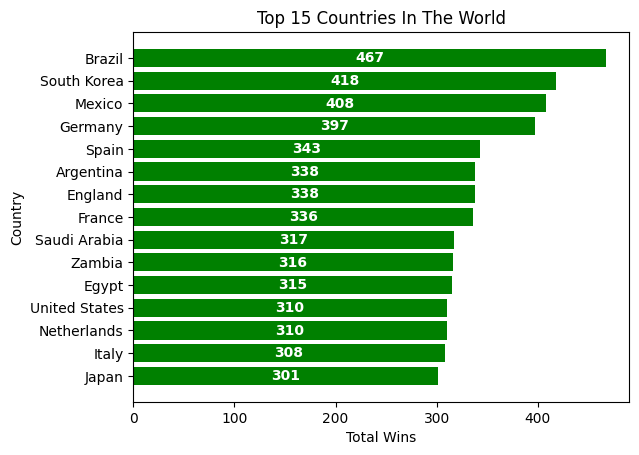

,Total Wins
Japan,301
Italy,308
Netherlands,310
United States,310
Egypt,315
Zambia,316
Saudi Arabia,317
France,336
England,338
Argentina,338


In [1]:
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv('data/results.csv')

data['winning_team'] = data.apply(lambda row: row['home_team'] if row['home_score'] > row['away_score'] else (row['away_team'] if row['away_score'] > row['home_score'] else 'draw'), axis=1) 

data = data[data['date'] > '1970']

total_wins = data[data['winning_team'] != 'draw']['winning_team'].value_counts().head(15)

total_wins_df = pd.DataFrame(total_wins)
total_wins_df.columns = ['Total Wins']
total_wins_df = total_wins_df.sort_values('Total Wins', ascending=True)

barh = plt.barh(total_wins_df.index, total_wins_df['Total Wins'], color='green')

plt.bar_label(barh, label_type= "center", color = 'white', fontweight = "bold")
plt.ylabel("Country")
plt.xlabel("Total Wins")
plt.title("Top 15 Countries In The World")
plt.show()

total_wins_df

Now we will look at the amount of goals per each minute played comparing both of the eras before and after 1990. For games after 1990, we could see a steady increase in each half up until a large spike at the whistle, with the most goals being within the 90-91 minute mark. Whereas before 1990, the goals over time are more evenly distributed throughout the game with a steady increase toward the end. 

This chart shows how players adapted over time when it came to maintaining stamina throughout a game and conserving it for the times it matters most- when you're at the brink of eternal glory or saving your squad from elimation.

In [1]:
import plotly.express as px
import matplotlib.pyplot as plt
import pandas as pd

goals_csv = pd.read_csv("data/goalscorers.csv")

goals_csv = goals_csv[goals_csv['minute'] <= 92]

goals_csv.loc[goals_csv['date'] <= '1990', 'Before_or_After_1990'] = 'Before 1990'
goals_csv.loc[goals_csv['date'] > '1990', 'Before_or_After_1990'] = 'After 1990'

fig = px.histogram(goals_csv, x="minute", nbins= 90, color = 'Before_or_After_1990', title="Goals by Minute Played Before and After 1990")

fig.update_layout(xaxis_title="Minute", yaxis_title="Number of Goals")
fig.show()



The Austrialian Archie Thompson leads the all time record for most goals scored in a single international appearance. This historic event occured during a 2002 FIFA World Cup qualifying match against American Samoa which ended 31-0 in Australia's favor, a score that is also a world record. This match inspired the 2023 film "Next Goal Wins: A True Underdog Story" written and directed by Taika Waititi about the ragtag American Samoa team. 

In [5]:
SELECT date, scorer, count(scorer) as goals
FROM 'data/goalscorers.csv' 
where scorer != 'NA'
GROUP BY date, scorer
having goals >= 3
ORDER BY goals desc


,date,scorer,goals
0,2001-04-11 00:00:00+00:00,Archie Thompson,13
1,2001-04-11 00:00:00+00:00,David Zdrilic,8
2,1997-06-02 00:00:00+00:00,Karim Bagheri,7
3,1981-08-14 00:00:00+00:00,Gary Cole,7
4,1993-07-11 00:00:00+00:00,Luís Roberto Alves,7
...,...,...,...
901,2021-11-14 00:00:00+00:00,Ondrej Duda,3
902,2022-03-24 00:00:00+00:00,Raphael Lea'i,3
903,2019-10-15 00:00:00+00:00,Omar Al Somah,3
904,2021-03-24 00:00:00+00:00,Tomáš Souček,3


The legendary footballer Cristiano Ronaldo leads the pack for the most hat-tricks (3 or more goals in one game) with a whopping 9. Several of these prestigious athletes are currently tied for 3rd including Lionel Messi, the latest recipient of the  golden ball award from the 2022 FIFA World Cup.

In [2]:
SELECT scorer, ANY_VALUE(score_count), count(scorer) as Hat_Tricks
FROM (SELECT date, scorer, count(scorer) as score_count
	FROM 'data/goalscorers.csv'
	WHERE scorer != 'NA'
	GROUP BY date, scorer
	having score_count >= 3)
GROUP BY scorer
order by hat_tricks desc
limit 10



,scorer,any_value(score_count),Hat_Tricks
0,Cristiano Ronaldo,3,9
1,Robert Lewandowski,4,6
2,Damian Mori,3,5
3,Vaughan Coveny,3,5
4,Harry Kane,3,5
5,Yang Xu,3,4
6,Just Fontaine,4,4
7,Gerd Müller,4,4
8,Kazuyoshi Miura,6,3
9,Toni Polster,3,3


## Predicting the Winning Team

When the football powerhouse Germany won the 2014 World Cup, the team used on-field cameras to collect data about player movements and decisions, identifying ways to exploit the weaknesses of their opponents and claim victory. While I lack the equipment for such an analysis, we can utlilize other predictive analysis techniques to have a good idea of who will win the Euro in 2024. 

To predict which country will win, we can use machine learning to train a model on historical match data to forecast potential outcomes of the tournament. To secure a more accurate prediction, the data set will be adjusted to only include matches that occured after 1990. 

Let's start by creating Dataframes from the available csv files to include only match results and the goal scorers for the countries participating in the tournament that are part of the European Association.


In [8]:
import pandas as pd

#convert the goalscorers and results to a pandas dataframe

results = pd.read_csv('data/results.csv')
goal_scorers = pd.read_csv("data/goalscorers.csv")

#define a list of the teams participating in the Euro 2024 tournament

Euro_2024 = ("Netherlands", "Croatia", "Spain", "Italy", "France", "Austria", "Czech Republic", "England", "Wales", "Isreal", "Bosnia and Herzegovina", "Serbia", "Scotland", "Finland", "Denmark", "Portugal", "Belgium", "Hungary", "Switzerland", "Poland", "Ukraine", "Iceland", "Norway", "Slovenia", "Republic of Ireland", "Albania", "Montenegro", "Romania", "Sweden", "Armenia", "Georgia", "Greece", "Turkey", "Kazakhstan", "Luxembourg", "Azerbaijan", "Kosovo", "Bulgaria", "Faroe Islands", "North Macedonia", "Slovakia", "Northern Ireland", "Cyprus", "Belarus", "Lithuania", "Gibraltar", "Estonia", "Latvia", "Moldova", "Malta", "Andorra", "San Marino", "Liechtenstein")

#historical match results of each of the countries 

Euro_match_results = results[results['home_team'].isin(Euro_2024) & results['away_team'].isin(Euro_2024)]

Euro_goal_scorers = goal_scorers[goal_scorers['home_team'].isin(Euro_2024) & goal_scorers['away_team'].isin(Euro_2024)]
#append the winning_team column that specifies which team won the match 

Euro_match_results['winning_team'] = Euro_match_results.apply(lambda row: row['home_team'] if row['home_score'] > row['away_score'] else (row['away_team'] if row['away_score'] > row['home_score'] else 'draw'), axis=1) 

#append the draw column that indicates if the match ended in a draw

Euro_match_results['draw'] = Euro_match_results.apply(lambda row: 1 if row["home_score"] == row['away_score'] else 0,  axis=1)

#create a variable for total score for each match
Euro_match_results['total_score'] = Euro_match_results['home_score'] + Euro_match_results['away_score']

#Filter the dataframe to only show matches that occured since 1990

Euro_match_results = Euro_match_results[Euro_match_results['date'] > '1990']
Euro_goal_scorers = Euro_goal_scorers[Euro_goal_scorers['date'] > '1990']

Euro_match_results




,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winning_team,draw,total_score
16186,1990-01-17,Greece,Belgium,2,0,Friendly,Athens,Greece,False,Greece,0,2
16214,1990-02-07,Malta,Norway,1,1,Malta International Tournament,Attard,Malta,False,draw,1,2
16228,1990-02-21,Belgium,Sweden,0,0,Friendly,Brussels,Belgium,False,draw,1,0
16232,1990-02-21,Netherlands,Italy,0,0,Friendly,Rotterdam,Netherlands,False,draw,1,0
16278,1990-03-27,Northern Ireland,Norway,2,3,Friendly,Belfast,Northern Ireland,False,Norway,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...
44928,2023-09-12,Malta,North Macedonia,0,2,UEFA Euro qualification,Ta' Qali,Malta,False,North Macedonia,0,2
44929,2023-09-12,Belgium,Estonia,5,0,UEFA Euro qualification,Brussels,Belgium,False,Belgium,0,5
44930,2023-09-12,Sweden,Austria,1,3,UEFA Euro qualification,Stockholm,Sweden,False,Austria,0,4
44931,2023-09-12,Switzerland,Andorra,3,0,UEFA Euro qualification,Sion,Switzerland,False,Switzerland,0,3


Just as we have done earlier, we will apply the exploratory techniques to show total wins per team as well as collect some statistics on total match score. 


Text(0.5, 1.0, 'Top 15 countries in the Euro since 1990')

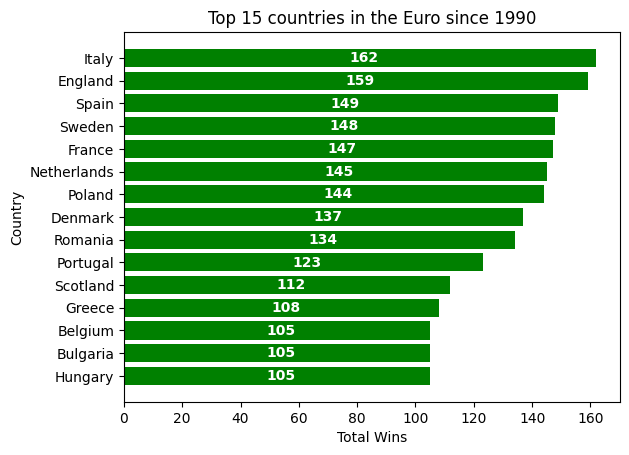

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

Euro_Results = pd.read_csv("Euro_Match_Results.csv")

Euro_total_wins = Euro_Results[Euro_Results['winning_team'] != 'draw']['winning_team'].value_counts().head(15)

Euro_total_wins_df = pd.DataFrame(Euro_total_wins)
Euro_total_wins_df.columns = ['Total Wins']
Euro_total_wins_df = Euro_total_wins_df.sort_values('Total Wins', ascending=True)

barh = plt.barh(Euro_total_wins_df.index, Euro_total_wins_df['Total Wins'], color='green')

plt.xlabel("Total Wins")
plt.ylabel("Country")
plt.bar_label(barh, label_type = 'center', padding = 3, color = 'white', fontweight= "bold")  # Corrected line
plt.title("Top 15 countries in the Euro since 1990")


In below histogram, we see the distribution of matches drawn and not drawn, with games ending in 1-1 (2 total score) as the most common drawn score and 3-3 (6 total score) as the least common.  Matches ending in 1-0 are the most common ending for the Euro. []()

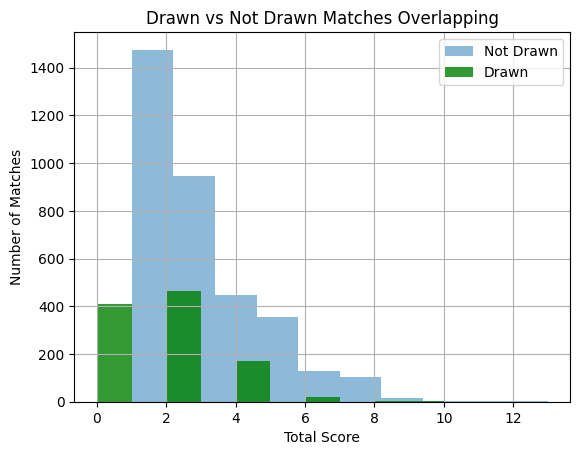

In [2]:
import matplotlib.pyplot as plt 
import pandas as pd 

Euro_Results = pd.read_csv("Euro_Match_Results.csv")

Euro_Results['total_score'] = Euro_Results['home_score'] + Euro_Results['away_score']

scorevsdraw = Euro_Results.groupby('draw')['total_score'].sum()

Euro_Results[Euro_Results['draw'] == 0]['total_score'].hist(alpha = .5)
Euro_Results[Euro_Results['draw'] == 1]['total_score'].hist(alpha = .8, color = 'green')

plt.legend(labels=['Not Drawn', 'Drawn'])
plt.title('Drawn vs Not Drawn Matches Overlapping')
plt.xlabel('Total Score')
plt.ylabel('Number of Matches')

plt.show()


In [3]:
#statistical analysis

import pandas as pd 
import numpy as np

Euro_Results = pd.read_csv("Euro_Match_Results.csv")
Euro_Results['total_score'] = Euro_Results['home_score'] + Euro_Results['away_score']


print("the mean total match score is " + str(Euro_Results['total_score'].mean()))
print("the median total match score is " + str(Euro_Results['total_score'].median()))
print("the standard deviation of the total match score is " + str(Euro_Results['total_score'].std()))

the mean total match score is 2.643124312431243
the median total match score is 2.0
the standard deviation of the total match score is 1.749191691768464


## Home vs. Away prediction - Logistic Regression

Teams having more home wins than away wins seems like an obvious conclusion, as the influence of fan support and the energy of playing on the home pitch are certainly factors that contribute to a victory. However, it could be surmised that when the odds are against you as an away team, the likelihood of overcoming those odds and winning can be a serious indicator of performance.

We will now employ a Logistic Regression model to discern which teams are likely to win for home vs away games. A positive coefficient indicates that the away team is more likely to win against their home adversaries, while a negative coefficient indicates the inverse; that there is a higher chance the away team would win. 

For Instance, Romania has a significant presence at home with a coefficient of -1.72 which is strong compared to the rest of list (ranked 6 out of 53) however while playing away, Romania appears to be weaker with a 0.13 coefficient (ranked 14 out of 53). 

Teams that have a coefficient of 0, such as Gibraltar, Israel, and Kosovo meant that 
the wins between home and away are so mixed that there is no correlation recognized between playing home or away and winning the game. 


In [38]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd

Euro_Results = pd.read_csv("Euro_Match_Results.csv")
home_team = Euro_Results['home_team']
away_team = Euro_Results['away_team']
home_score = Euro_Results['home_score']
away_score = Euro_Results['away_score']

team_names = ["Netherlands", "Croatia", "Spain", "Italy", "France", "Austria", "Czech Republic", "England", "Wales", "Israel", "Bosnia and Herzegovina", "Serbia", "Scotland", "Finland", "Denmark", "Portugal", "Belgium", "Hungary", "Switzerland", "Poland", "Ukraine", "Iceland", "Norway", "Slovenia", "Republic of Ireland", "Albania", "Montenegro", "Romania", "Sweden", "Armenia", "Georgia", "Greece", "Turkey", "Kazakhstan", "Luxembourg", "Azerbaijan", "Kosovo", "Bulgaria", "Faroe Islands", "North Macedonia", "Slovakia", "Northern Ireland", "Cyprus", "Belarus", "Lithuania", "Gibraltar", "Estonia", "Latvia", "Moldova", "Malta", "Andorra", "San Marino", "Liechtenstein"]

team_encoder = OneHotEncoder(sparse=False).fit(np.array(team_names).reshape(-1, 1))

home_dummies = team_encoder.transform(np.array(home_team).reshape(-1, 1))
away_dummies = team_encoder.transform(np.array(away_team).reshape(-1, 1))

x = np.concatenate([home_dummies, away_dummies], axis=1)
y = np.sign(home_score - away_score)

model = LogisticRegression(penalty="l2", fit_intercept=False, multi_class="ovr", C=1)
model.fit(x,y)

model = model.coef_[0]          
    
team_names = [x.replace("x0", "") for x in team_encoder.get_feature_names_out()]
    
home_coef = model[:len(model)//2]
away_coef = model[len(model)//2:]
    
teams_coef = pd.DataFrame({'team': team_names, 'away wins coefficient':away_coef, 'home wins coefficient':home_coef})

teams_coef


,team,away wins coefficient,home wins coefficient
0,_Albania,-1.747709,-0.021215
1,_Andorra,-2.479982,1.631461
2,_Armenia,-1.295195,-0.211452
3,_Austria,0.062095,-1.074319
4,_Azerbaijan,-2.721003,0.219277
5,_Belarus,-1.013272,0.010952
6,_Belgium,0.011748,-1.544184
7,_Bosnia and Herzegovina,-0.712773,-0.367858
8,_Bulgaria,-0.119319,-1.162050
9,_Croatia,0.984689,-2.017951


France, The Netherlands, Croatia, and England have both high chances of winning both at home and away, solidifing themselves as the top contenders in the Euro in 2024. Not to say this is for sure betting advice, but predictions are predictions. 